In [30]:
import pandas as pd
import numpy as np

aisle = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/aisles.csv')
department = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/departments.csv')
order_products_prior = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/order_products__prior.csv')
order_products_train = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/order_products__train.csv')
orders = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/orders.csv')
products = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/products.csv')
new_aisle_match = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/new_aisle_match.csv');


In [31]:
# Take out orderID and productID from both train and prior table and merge them into one order_products_id table
order_products_id1 = order_products_train[['order_id','product_id']]
order_products_id2 = order_products_prior[['order_id','product_id']]
order_products_id = order_products_id1.append(order_products_id2, ignore_index=True)
#order_products_id

In [32]:
# take out orderID and userID from orders table
order_user_id = orders[['order_id','user_id']]
#order_user_id

In [33]:
'''
user_order_count_annual = order_user_id[['user_id','order_id']]
user_order_count_annual = user_order_count_annual.groupby(['user_id']).agg({'order_id': 'count'}).reset_index()
user_order_count_annual.rename(columns={"order_id": "order_count"}, inplace=True)
user_order_count_annual
'''


'\nuser_order_count_annual = order_user_id[[\'user_id\',\'order_id\']]\nuser_order_count_annual = user_order_count_annual.groupby([\'user_id\']).agg({\'order_id\': \'count\'}).reset_index()\nuser_order_count_annual.rename(columns={"order_id": "order_count"}, inplace=True)\nuser_order_count_annual\n'

In [34]:
# to see how many orders each user has altogether
user_order_count = order_user_id[['user_id','order_id']]
user_order_count = user_order_count.groupby(['user_id']).agg({'order_id': 'count'}).reset_index()
user_order_count.rename(columns={"order_id": "order_count"}, inplace=True)
user_order_count

,user_id,order_count
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


# CUSTOMER SELECTION

In [35]:
# If we assume a customer does grocery shopping at least once every other week
# Among 206K customers, only 40K customers have transaction count more than 24
# It would be better to use customers who has been shopping for a year for customer segregation since users with less
# than this tx count might only introduce unnecessary noise to the data
user_order_count_annual = user_order_count[user_order_count['order_count'] > 24]
user_order_count_annual

,user_id,order_count
16,17,41
20,21,34
26,27,82
27,28,25
35,36,38
...,...,...
206186,206187,35
206192,206193,42
206200,206201,33
206205,206206,68


In [36]:
#combine order_products and products table to see what aisle each product belongs for each order
order_product_aisle = order_products_id.merge(products,on='product_id')
order_product_aisle

,order_id,product_id,product_name,aisle_id,department_id
0,1,49302,Bulgarian Yogurt,120,16
1,816049,49302,Bulgarian Yogurt,120,16
2,1242203,49302,Bulgarian Yogurt,120,16
3,1383349,49302,Bulgarian Yogurt,120,16
4,1787378,49302,Bulgarian Yogurt,120,16
...,...,...,...,...,...
33819101,3265099,43492,Gourmet Burger Seasoning,104,13
33819102,3361945,43492,Gourmet Burger Seasoning,104,13
33819103,3267201,33097,Piquillo & Jalapeno Bruschetta,81,15
33819104,3393151,38977,Original Jerky,100,21


In [37]:
# to see which aisle is most popular
pd.set_option('display.max_rows', 134)
aisle_product_count = order_product_aisle.groupby('aisle_id').agg({'product_id': 'count'})
aisle_product_count = aisle_product_count.reset_index()
aisle_product_count = aisle_product_count.sort_values('product_id', ascending=False)
aisle_product_count = aisle_product_count.merge(aisle,on='aisle_id')
aisle_product_count.rename(columns={"product_id": "product_purchase_count"}, inplace=True)
total_product_count = sum(aisle_product_count['product_purchase_count'])
aisle_product_count['percentage'] = aisle_product_count['product_purchase_count']/total_product_count
aisle_product_count
#aisle_product_count.to_csv(r'C:\Users\lyn02\Desktop\CMPE255 Project\aisle_product_count.csv', index = True)

,aisle_id,product_purchase_count,aisle,percentage
0,24,3792661,fresh fruits,0.112146
1,83,3568630,fresh vegetables,0.105521
2,123,1843806,packaged vegetables fruits,0.054520
3,120,1507583,yogurt,0.044578
4,21,1021462,packaged cheese,0.030204
5,84,923659,milk,0.027312
6,115,878150,water seltzer sparkling water,0.025966
7,107,753739,chips pretzels,0.022287
8,91,664493,soy lactosefree,0.019648
9,112,608469,bread,0.017992


In [38]:
#from order_product_aisle table, only select orderID and aisleID to aggregate some data since we only deal with 
#aisle level granularity
#In addition, count of products from each aisle for each order is kept
order_aisle_id = order_product_aisle[['order_id','aisle_id']]
order_aisle_id['aisle_id2'] = order_product_aisle['aisle_id']
#order_aisle_id
order_aisle_count = order_aisle_id.groupby(['order_id','aisle_id']).agg({'aisle_id2': 'count'}).reset_index()
order_aisle_count.rename(columns={"aisle_id2": "product_count"}, inplace=True)
order_aisle_count
#print(sum(order_aisle_count['count']))

<ipython-input-38-b37badbd2e77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_aisle_id['aisle_id2'] = order_product_aisle['aisle_id']


,order_id,aisle_id,product_count
0,1,21,1
1,1,24,2
2,1,83,2
3,1,95,1
4,1,108,1
...,...,...,...
24329217,3421083,52,1
24329218,3421083,74,1
24329219,3421083,78,1
24329220,3421083,92,4


In [39]:
#join order_user_id table and order_aisle_count table to see which order belongs to which user
order_user_aisle = order_aisle_count.merge(order_user_id, on='order_id')
order_user_aisle

,order_id,aisle_id,product_count,user_id
0,1,21,1,112108
1,1,24,2,112108
2,1,83,2,112108
3,1,95,1,112108
4,1,108,1,112108
...,...,...,...,...
24329217,3421083,52,1,25247
24329218,3421083,74,1,25247
24329219,3421083,78,1,25247
24329220,3421083,92,4,25247


In [40]:
#from order_user_aisle table, take out orderID and group by user_id, aisle_id
user_aisle_id = order_user_aisle[['user_id','aisle_id','product_count']]
user_aisle_count = user_aisle_id.groupby(['user_id','aisle_id']).agg({'product_count': 'sum'}).reset_index()
user_aisle_count

,user_id,aisle_id,product_count
0,1,21,9
1,1,23,13
2,1,24,5
3,1,45,2
4,1,53,3
...,...,...,...
5919835,206209,120,3
5919836,206209,121,7
5919837,206209,123,5
5919838,206209,130,3


In [41]:
# user_aisle_count right join user_order_count_annual 
user_aisle_order_count_annual = user_aisle_count.merge(user_order_count_annual, how='right',on='user_id')
user_aisle_order_count_annual

,user_id,aisle_id,product_count,order_count
0,17,4,5,41
1,17,5,4,41
2,17,17,13,41
3,17,21,5,41
4,17,23,4,41
...,...,...,...,...
1787015,206208,121,13,50
1787016,206208,123,71,50
1787017,206208,128,7,50
1787018,206208,130,2,50


In [42]:

# get total product count for each user each aisle
user_aisle_order_count_annual['total_prod_count'] = user_aisle_order_count_annual['product_count']*user_aisle_order_count_annual['order_count']
user_aisle_order_count_annual
# look at what percentage of users would buy products from each aisle
aisle_user = user_aisle_order_count_annual[['aisle_id','user_id','total_prod_count']]
aisle_user = aisle_user.groupby(['aisle_id']).agg({'user_id':'count','total_prod_count': 'sum'}).reset_index()
aisle_user.rename(columns={"user_id": 'user_count'}, inplace=True)
aisle_user = aisle_user.sort_values('user_count', ascending=False)
aisle_user = aisle_user.merge(aisle, how='left', on='aisle_id')
total_user_count = 40211 # from previous step, total count of customers with more than 25 tx
aisle_user['user_percent'] = aisle_user['user_count'] / total_user_count
total_prod_count = sum(aisle_user['total_prod_count'])
aisle_user['prod_percent'] = aisle_user['total_prod_count'] / total_prod_count
aisle_user

,aisle_id,user_count,total_prod_count,aisle,user_percent,prod_percent
0,24,38707,113088774,fresh fruits,0.962597,0.123012
1,123,37195,51433010,packaged vegetables fruits,0.924996,0.055946
2,83,35267,97143270,fresh vegetables,0.877049,0.105667
3,21,33595,27367667,packaged cheese,0.835468,0.029769
4,120,32474,44570617,yogurt,0.807590,0.048482
5,107,30531,19730451,chips pretzels,0.759270,0.021462
6,84,29755,29099969,milk,0.739972,0.031653
7,116,28994,14048803,frozen produce,0.721046,0.015282
8,112,28324,17147369,bread,0.704384,0.018652
9,17,28302,9255927,baking ingredients,0.703837,0.010068


# Aisle Grouping

In [43]:
#aisle grouping
new_user_aisle_order_count_annual = user_aisle_order_count_annual.merge(new_aisle_match, how='inner', on='aisle_id')
new_user_aisle_order_count_annual

,user_id,aisle_id,product_count,order_count,total_prod_count,new_aisle_ID,aisle
0,17,4,5,41,205,37,instant foods
1,21,4,1,34,34,37,instant foods
2,36,4,4,38,152,37,instant foods
3,52,4,1,28,28,37,instant foods
4,63,4,20,40,800,37,instant foods
...,...,...,...,...,...,...,...
1787015,205510,113,1,51,51,72,frozen juice
1787016,205558,113,2,34,68,72,frozen juice
1787017,205780,113,9,29,261,72,frozen juice
1787018,205868,113,10,34,340,72,frozen juice


In [44]:
new_user_aisle_order_count_annual = new_user_aisle_order_count_annual[['user_id','new_aisle_ID','product_count','order_count','total_prod_count']]
new_user_aisle_order_count_annual = new_user_aisle_order_count_annual.groupby(['user_id','new_aisle_ID']).agg({'product_count':'sum','order_count':'sum','total_prod_count': 'sum'}).reset_index()
#new_user_aisle_order_count_annual.rename(columns={"new_aisle_ID": 'aisle_id'}, inplace=True)
new_user_aisle_order_count_annual

,user_id,new_aisle_ID,product_count,order_count,total_prod_count
0,17,1,79,328,3239
1,17,2,7,82,287
2,17,3,6,41,246
3,17,6,10,41,410
4,17,7,1,41,41
...,...,...,...,...,...
1297702,206208,51,2,50,100
1297703,206208,53,2,50,100
1297704,206208,55,5,50,250
1297705,206208,57,3,50,150


In [45]:
print(sum(new_user_aisle_order_count_annual['total_prod_count']))
print(sum(user_aisle_order_count_annual['total_prod_count']))

919330758
919330758


In [46]:
new_aisle_match = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/new_aisle_match.csv');
# look at what percentage of users would buy products from each aisle
aisle_user = new_user_aisle_order_count_annual[['new_aisle_ID','user_id','total_prod_count']]
aisle_user = aisle_user.groupby(['new_aisle_ID']).agg({'user_id':'count','total_prod_count': 'sum'}).reset_index()
aisle_user.rename(columns={"user_id": 'user_count'}, inplace=True)
aisle_user = aisle_user.sort_values('user_count', ascending=False)
aisle_user = aisle_user.merge(new_aisle_match, how='left', on='new_aisle_ID')
total_user_count = 40211 # from previous step, total count of customers with more than 24 tx
aisle_user['user_percent'] = aisle_user['user_count'] / total_user_count
total_prod_count = sum(aisle_user['total_prod_count'])
aisle_user['prod_percent'] = aisle_user['total_prod_count'] / total_prod_count
aisle_user = aisle_user[['new_aisle_ID', 'user_count', 'total_prod_count','aisle','user_percent','prod_percent']]
aisle_user.drop_duplicates(inplace=True)
aisle_user

,new_aisle_ID,user_count,total_prod_count,aisle,user_percent,prod_percent
0,1,40122,327544445,essential,0.997787,0.043254
20,2,35300,38267543,cheese,0.877869,0.005053
23,3,32474,44570617,yogurt,0.807590,0.005886
24,12,31300,13510197,baking stuff,0.778394,0.001784
28,6,31258,22432604,bread,0.777349,0.002962
30,4,30531,19730451,chips pretzels,0.759270,0.002606
31,5,29755,29099969,milk,0.739972,0.003843
32,7,28994,14048803,frozen produce,0.721046,0.001855
33,24,28038,11105403,honeys syrups nectars,0.697272,0.001467
35,26,27575,13421908,pasta,0.685758,0.001772


In [47]:
print(sum(aisle_user['total_prod_count']))

919330758


# aisle filtering

In [48]:
# if we assume that if more than 70% of the users buy from an aisle, it is an essential product aisle
# we can exclude those aisles from the data since they wouldn't help much in differentiating customers into 
# different groups

non_essential_aisle = aisle_user.loc[(aisle_user['user_percent'] < 0.7) & (aisle_user['new_aisle_ID'] != 17), 'new_aisle_ID']
#non_essential_aisle = aisle_user.loc[(aisle_user['new_aisle_ID'] < 0.7), 'aisle_id']
non_essential_aisle
user_aisle_order_count_annual_nesse = new_user_aisle_order_count_annual.merge(non_essential_aisle, how='inner', on='new_aisle_ID')
user_aisle_order_count_annual_nesse

,user_id,new_aisle_ID,product_count,order_count,total_prod_count
0,17,9,31,41,1271
1,21,9,26,34,884
2,28,9,3,25,75
3,50,9,19,68,1292
4,54,9,12,78,936
...,...,...,...,...,...
1013475,205510,72,1,51,51
1013476,205558,72,2,34,68
1013477,205780,72,9,29,261
1013478,205868,72,10,34,340


In [49]:
# divide product count by order count to get for aisle, how many products on average each customer would buy per order
user_aisle_order_count_annual_nesse['avg'] = user_aisle_order_count_annual_nesse['product_count']/user_aisle_order_count_annual_nesse['order_count']
user_aisle_avgCount_annual = user_aisle_order_count_annual_nesse[['user_id','new_aisle_ID','avg']]
user_aisle_avgCount_annual

,user_id,new_aisle_ID,avg
0,17,9,0.756098
1,21,9,0.764706
2,28,9,0.120000
3,50,9,0.279412
4,54,9,0.153846
...,...,...,...
1013475,205510,72,0.019608
1013476,205558,72,0.058824
1013477,205780,72,0.310345
1013478,205868,72,0.294118


In [50]:
data = pd.pivot_table(user_aisle_avgCount_annual, values='avg', index=['user_id'],columns=['new_aisle_ID'], aggfunc=np.sum, fill_value=0)
data.reset_index(inplace=True)
# index match
index_match = data['user_id']
#index_match
data.set_index('user_id', inplace=True)
#data_final = data[data.columns[1:136]] 
#data_final
data

new_aisle_ID,8,9,10,11,13,14,15,16,18,19,...,63,64,65,66,67,68,69,70,71,72
user_id,,,,,,,,,,,,,,,,,,,,,
17,0.000000,0.756098,0.000000,0.341463,0.292683,0.000000,0.073171,0.000000,0.048780,0.170732,...,0.00000,0.0,0.0,0.000000,0.000000,0.780488,0.000000,0.000000,0.0,0.0
21,0.029412,0.764706,0.382353,0.073529,0.000000,0.147059,0.117647,0.029412,0.000000,0.000000,...,0.00000,0.0,0.0,0.117647,0.000000,0.088235,0.000000,0.000000,0.0,0.0
27,0.378049,0.000000,0.036585,0.000000,0.000000,1.707317,0.097561,0.000000,0.012195,0.012195,...,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.012195,0.000000,0.0,0.0
28,0.160000,0.120000,0.120000,0.120000,0.000000,0.000000,0.120000,0.040000,0.000000,0.080000,...,0.00000,0.0,0.0,0.000000,0.080000,0.000000,0.000000,0.000000,0.0,0.0
36,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.026316,0.052632,0.000000,0.000000,...,0.00000,0.0,0.0,0.763158,0.000000,0.000000,0.000000,0.763158,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206187,0.057143,0.000000,0.028571,0.000000,0.000000,0.000000,0.057143,0.000000,0.028571,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
206193,0.309524,0.238095,0.095238,0.119048,0.023810,0.000000,0.047619,0.023810,0.047619,0.000000,...,0.02381,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
206201,0.000000,0.454545,0.242424,0.106061,0.212121,0.030303,0.030303,0.000000,0.090909,0.000000,...,0.00000,0.0,0.0,0.000000,0.181818,0.000000,0.000000,0.000000,0.0,0.0


In [51]:
# principal component analysis for dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
pca_50 = pca.fit_transform(data)
np.sum(pca.explained_variance_ratio_)

0.9432431137764432

In [52]:
pca = PCA(n_components=33)
pca_33 = pca.fit_transform(data)
np.sum(pca.explained_variance_ratio_)

0.9000676131853486

In [53]:
pca_33_90percent = pd.DataFrame(pca_33)
pca_33_90percent

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.150462,0.003178,-0.180588,-0.516391,0.576568,-0.192793,0.289512,0.033763,-0.103560,-0.091273,...,-0.084630,0.160400,0.048819,0.159564,0.142805,0.051658,0.072807,0.076363,0.068473,0.030084
1,-0.035519,-0.154177,-0.023286,0.131965,0.019818,-0.129629,-0.190683,0.099546,0.196817,-0.031515,...,-0.111898,0.032072,0.138985,-0.001013,0.041218,0.029986,-0.014432,-0.041659,0.127935,0.015687
2,0.645672,-0.707688,1.093560,0.539572,0.151345,-0.043709,0.242038,0.182436,-0.083884,-0.367267,...,0.033855,0.062812,-0.026326,-0.060953,-0.037733,0.019948,0.008972,0.025476,0.172074,-0.002135
3,-0.284545,0.017634,-0.048964,-0.091876,-0.045547,-0.065041,-0.111352,0.124742,-0.086397,-0.219257,...,0.003057,-0.051326,0.006890,-0.067321,-0.147633,0.053141,-0.015522,0.070632,-0.022138,-0.133218
4,-0.430649,0.005986,0.000834,0.121019,0.008683,-0.180342,0.035601,0.085049,0.162529,0.125459,...,0.023133,0.011898,0.639385,0.307747,0.050992,0.026895,0.080391,0.018310,0.183358,-0.007041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40138,-0.462197,0.045347,0.025338,0.092870,-0.117712,-0.197290,0.122814,-0.095760,0.050507,0.036555,...,-0.001844,-0.024532,-0.011804,-0.008137,-0.057006,0.033424,0.001812,-0.010714,0.034538,-0.064211
40139,-0.088506,0.374115,-0.036473,0.126507,-0.245476,-0.124445,0.167764,-0.043843,-0.108957,0.030269,...,0.042119,-0.020955,0.001513,0.011296,-0.010342,0.043078,-0.000119,-0.084082,-0.002234,-0.026579
40140,0.475201,-0.364222,-0.750421,0.325774,0.128328,-0.280781,-0.319046,-0.092954,-0.145869,-0.295072,...,-0.006750,-0.163486,0.064957,-0.129645,0.142170,-0.122530,-0.069810,-0.045638,-0.073377,-0.061977
40141,-0.114328,-0.128299,0.130897,-0.031235,0.178515,-0.236306,-0.060697,0.065347,-0.516979,0.346801,...,-0.078887,0.060839,0.017123,-0.052798,0.100402,0.018468,-0.060700,-0.039217,-0.046393,0.047433


In [54]:
# k means clustering on pca_data
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X_train, x_test = train_test_split(pca_33_90percent, test_size = 0.3, random_state=42)

([<matplotlib.axis.XTick at 0x1e68f4617c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

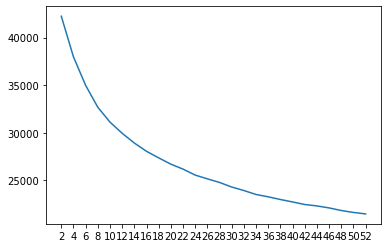

In [26]:
import matplotlib.pyplot as plt
df = pd.DataFrame(columns = ['cluster','inertia'])
for n in range(2, 54, 2):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(X_train)
    df = df.append({'cluster':n, 'inertia': kmeans.inertia_}, ignore_index=True)

plt.plot(df['cluster'],df['inertia'])
plt.xticks(np.arange(2, 54, 2.0))

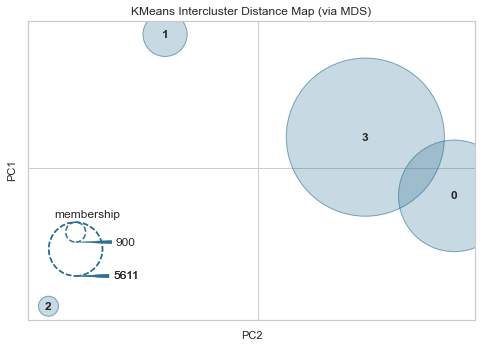

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [57]:
from yellowbrick.cluster import InterclusterDistance
#Intercluster distance
# the closer to centers are in the visualization, the closer they are in the original feature space
# cluster size depends on number of instances belongs to them --> gives a sense of relative importance of clusters
# overlapping clusters do not mean they overlap in the original feature space
modelKmean = KMeans(n_clusters=4, random_state=42)
visualizer = InterclusterDistance(modelKmean)
visualizer.fit(X_train)
visualizer.show()

In [59]:
# from result above, it looks like 4 clusters is a good separation of the data
y_train_kmean = modelKmean.predict(X_train)
y_train_kmean= pd.DataFrame(y_train_kmean)

y_test_kmean = modelKmean.predict(x_test)
y_test_kmean= pd.DataFrame(y_test_kmean)

y_train_kmean
#y_pred_kmean = y_train_kmean.append(y_test_kmean)

,0
0,3
1,0
2,3
3,3
4,0
...,...
28095,2
28096,3
28097,0
28098,3


In [63]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
25297,-0.371222,0.034340,-0.049040,-0.028611,0.143903,-0.197355,0.092458,-0.068615,0.045623,-0.047632,...,-0.009501,-0.147927,0.017341,-0.006661,-0.019545,-0.048253,-0.034916,-0.002594,-0.040711,-0.015673
20188,-0.395121,0.001838,-0.004197,0.079251,0.048052,-0.185509,-0.002897,0.065549,-0.090573,0.108449,...,-0.022238,0.003953,-0.052579,-0.043240,-0.052918,-0.034621,0.170735,0.031672,0.001877,0.001538
21680,-0.080642,0.006870,-0.137017,-0.165755,0.056671,-0.103917,-0.316307,-0.100803,0.269135,0.057457,...,0.080578,-0.101578,-0.236449,0.528386,0.207403,0.056995,0.273614,-0.201401,-0.109005,0.325386
9701,-0.028281,-0.008842,-0.065710,-0.154534,0.038860,-0.134860,0.237860,-0.259800,0.110118,0.033560,...,-0.002200,-0.068730,0.013568,-0.025014,-0.065850,0.077629,-0.009988,-0.017866,-0.069371,0.128024
38362,-0.187856,0.001607,0.012857,-0.245818,-0.304857,0.125323,0.140412,0.242921,-0.591681,0.195530,...,-0.067874,-0.052532,-0.017084,0.006017,0.036684,0.116858,-0.013329,-0.129939,-0.050704,-0.056246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24726,0.085583,0.434064,0.064690,0.172396,0.035832,-0.101817,0.151989,0.087686,-0.074548,0.138625,...,0.161431,-0.233980,0.022314,-0.028885,0.206189,-0.024871,0.042822,-0.093994,0.013220,-0.161883
25747,-0.538648,0.030840,0.018718,0.202613,0.053384,-0.136744,0.122430,0.010813,0.037521,-0.039782,...,-0.016289,-0.006341,-0.024064,-0.009450,0.012667,0.011389,-0.015187,0.007354,-0.012108,0.015784
32333,-0.179385,-0.035076,0.131360,-0.073633,-0.390936,0.099885,0.191626,0.127048,0.031937,-0.084017,...,0.075167,0.043664,-0.021741,-0.044830,0.100878,-0.043705,-0.009789,0.029306,-0.027157,-0.032363
8978,0.099178,0.891216,0.055500,0.241014,-0.166419,0.303959,0.167392,0.190056,0.029921,0.068135,...,-0.060898,0.032942,-0.019048,-0.021873,0.035093,-0.006505,0.025462,-0.004974,-0.016266,-0.046393


In [62]:
result_train = X_train.copy(deep=True)
result_train.reset_index(inplace=True)
result_train.insert(1,'label',y_train_kmean)
result_train = result_train.rename(columns = {'index':'X'})
result_train = result_train[['X','label']]
result_train


result_test = x_test.copy(deep=True)
result_test.reset_index(inplace=True)
result_test.insert(1,'label',y_test_kmean)
result_test = result_test.rename(columns = {'index':'X'})
result_test = result_test[['X','label']]
result_test


,X,label
0,25297,3
1,20188,3
2,21680,3
3,9701,3
4,38362,3
...,...,...
12038,24726,3
12039,25747,3
12040,32333,3
12041,8978,3


In [65]:
result = result_train.append(result_test)
result

,X,label
0,30999,3
1,10610,0
2,40066,3
3,2220,3
4,1259,0
...,...,...
12038,24726,3
12039,25747,3
12040,32333,3
12041,8978,3


In [64]:
index_match = pd.DataFrame(index_match)
index_match.reset_index(inplace=True)
index_match = index_match.rename(columns = {'index':'X'})
index_match

,X,user_id
0,0,17
1,1,21
2,2,27
3,3,28
4,4,36
...,...,...
40138,40138,206187
40139,40139,206193
40140,40140,206201
40141,40141,206206


In [66]:
final_result = index_match.merge(result, on = 'X')
final_result = final_result[['user_id','label']]
final_result

,user_id,label
0,17,3
1,21,3
2,27,0
3,28,3
4,36,3
...,...,...
40138,206187,3
40139,206193,3
40140,206201,0
40141,206206,3


In [68]:
final_result.to_csv(r'C:\Users\lyn02\Desktop\CMPE255 Project\customer_classification.csv', index = True)

In [67]:
test = user_aisle_avgCount_annual.merge(final_result, how='inner', on='user_id')
test.to_csv(r'C:\Users\lyn02\Desktop\CMPE255 Project\test.csv', index = True)
test

,user_id,new_aisle_ID,avg,label
0,17,9,0.756098,3
1,17,11,0.341463,3
2,17,13,0.292683,3
3,17,15,0.073171,3
4,17,18,0.048780,3
...,...,...,...,...
1013475,31356,61,0.086207,3
1013476,112861,61,0.114286,3
1013477,140884,61,1.142857,3
1013478,175585,61,0.118421,3


In [28]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

np.set_printoptions(threshold=np.inf)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) # n_samples - 1 = 1500-1=1499
    n_samples = len(model.labels_) # 1500
    for i, merge in enumerate(model.children_):
        current_count = 0
        
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)





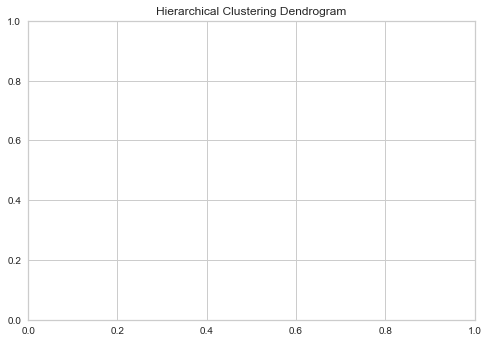

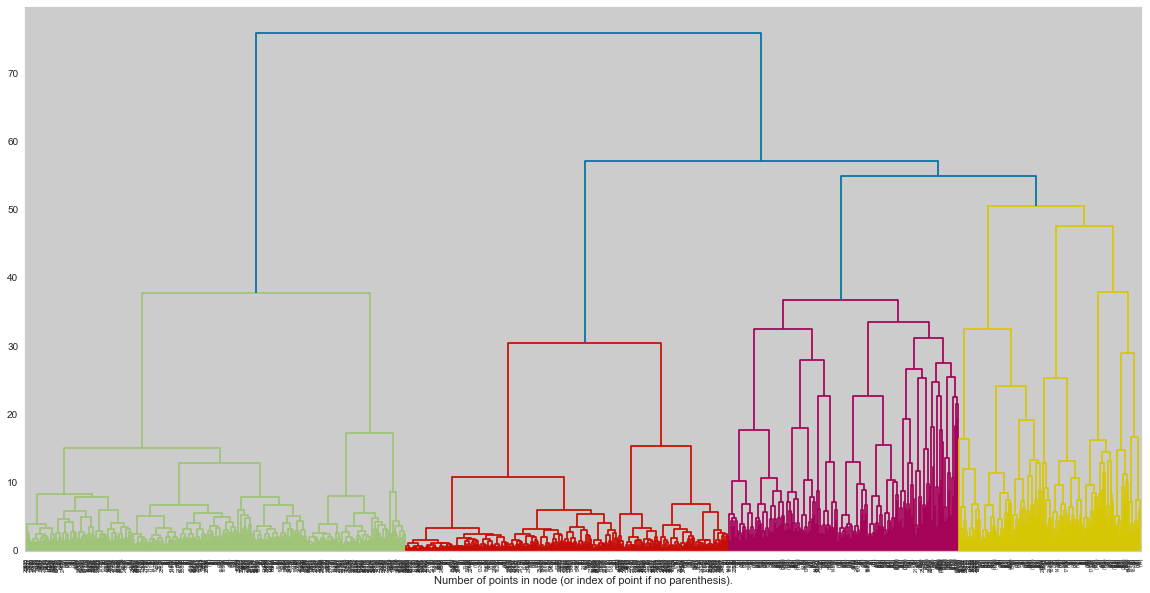

In [29]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_train)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plt.figure(figsize=(20,10))
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
#y_pred_agg = model.labels_